In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
# Read the CSV file into a Pandas DataFrame
data_df = pd.read_csv(
    Path('Resources/loan_data_cleaned.csv')   
)

# Review the DataFrame
data_df.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,Graduate,No,96000,299000,12,778,24000,176000,227000,80000,Approved
1,1,2,0,Not Graduate,Yes,41000,122000,8,417,27000,22000,88000,33000,Rejected
2,2,3,3,Graduate,No,91000,297000,20,506,71000,45000,333000,128000,Rejected
3,3,4,3,Graduate,No,82000,307000,8,467,182000,33000,233000,79000,Rejected
4,4,5,5,Not Graduate,Yes,98000,242000,20,382,124000,82000,294000,50000,Rejected


In [22]:
print(data_df.columns)

Index(['Unnamed: 0', 'loan_id', ' no_of_dependents', ' education',
       ' self_employed', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [28]:
# One-hot encode the 'education' and 'self_employed' columns
data_df = data_df.replace({' loan_status': {'Approved': 1, 'Rejected': 0}, 
                 ' education': {' Graduate': 1, ' Not Graduate': 0}, 
                 ' self_employed': {' Yes': 1, ' No':0}})

In [25]:
data_df[' loan_status'].unique()

array([1, 0], dtype=int64)

In [29]:
data_df.head()

,Unnamed: 0,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0,1,2,1,0,96000,299000,12,778,24000,176000,227000,80000,1
1,1,2,0,0,1,41000,122000,8,417,27000,22000,88000,33000,0
2,2,3,3,1,0,91000,297000,20,506,71000,45000,333000,128000,0
3,3,4,3,1,0,82000,307000,8,467,182000,33000,233000,79000,0
4,4,5,5,0,1,98000,242000,20,382,124000,82000,294000,50000,0


In [30]:
# Separate the features, X, from the target variable, y
y = data_df[' loan_status']
X = data_df.drop(columns=' loan_status')

In [31]:
#drop the 'Unnamed: 0' and 'loan_id' columns
X = X.drop(columns=['Unnamed: 0', 'loan_id'])

In [32]:
print(X.head())
print(y.head())

    no_of_dependents   education   self_employed   income_annum   loan_amount  \
0                  2           1               0          96000        299000   
1                  0           0               1          41000        122000   
2                  3           1               0          91000        297000   
3                  3           1               0          82000        307000   
4                  5           0               1          98000        242000   

    loan_term   cibil_score   residential_assets_value  \
0          12           778                      24000   
1           8           417                      27000   
2          20           506                      71000   
3           8           467                     182000   
4          20           382                     124000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  
0                    176000                227000              80000  
1                     

In [33]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
## Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [35]:
## Making Predictions Using the Random Forest Model
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [36]:
## Model Evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Rejected", "Actual Approved"], columns=["Predicted Rejected", "Predicted Approved"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [37]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Rejected,Predicted Approved
Actual Rejected,402,15
Actual Approved,11,640


Accuracy Score : 0.9756554307116105
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       417
           1       0.98      0.98      0.98       651

    accuracy                           0.98      1068
   macro avg       0.98      0.97      0.97      1068
weighted avg       0.98      0.98      0.98      1068



In [38]:
# Convert confusion matrix into a DataFrame
# confusion_df = pd.DataFrame(
#     [[640, 11], [17, 400]], 
#     index=["Actual Rejected", "Actual Approved"], 
#     columns=["Predicted Rejected", "Predicted Approved"]
# )

# Save confusion matrix to CSV
cm_df.to_csv("confusion_matrix.csv")

In [42]:
# Convert classification report into a dictionary (update below values to be populated automatically)
from sklearn.metrics import classification_report

# y_true = ["Rejected"]*640 + ["Approved"]*11 + ["Rejected"]*17 + ["Approved"]*400
# y_pred = ["Rejected"]*651 + ["Approved"]*417

report_dict = classification_report(y_test, predictions, output_dict=True)

# Convert dictionary into a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save classification report to CSV
report_df.to_csv("classification_report.csv")

In [38]:
# # Confusion Matrix Data
# conf_matrix = [[640, 11], [17, 400]]

# # Create a DataFrame from the confusion matrix
# conf_matrix_df = pd.DataFrame(
#     conf_matrix, 
#     index=["Actual Rejected", "Actual Approved"], 
#     columns=["Predicted Rejected", "Predicted Approved"]
# )

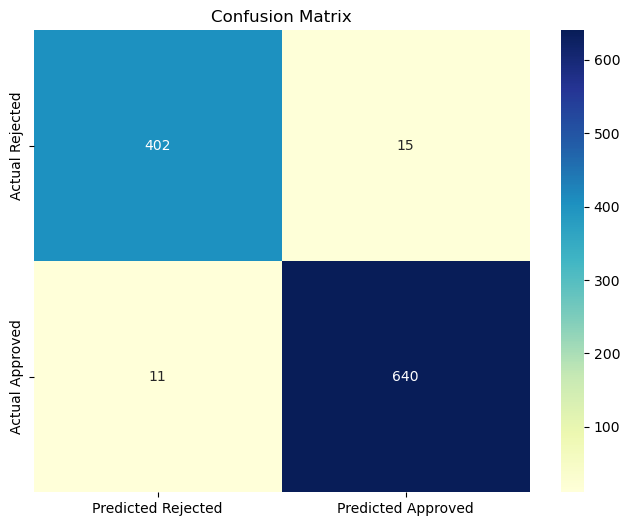

In [39]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt="g")
plt.title("Confusion Matrix")
plt.show()

In [44]:
## Feature Importance
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted_importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
print(sorted_importances)

[(0.8105972337484784, ' cibil_score'), (0.06380439360435389, ' loan_term'), (0.02922552196059581, ' loan_amount'), (0.01925086721078427, ' income_annum'), (0.01717029555286379, ' luxury_assets_value'), (0.0167826348916061, ' residential_assets_value'), (0.015863588059832238, ' commercial_assets_value'), (0.015053351824100794, ' bank_asset_value'), (0.007817679164149145, ' no_of_dependents'), (0.0024309607999167624, ' self_employed'), (0.0020034731833188436, ' education')]


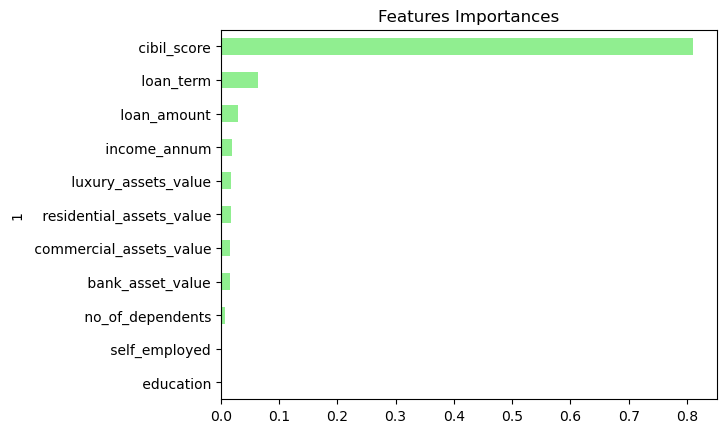

In [45]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted_importances)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)
plt.show()


In [46]:
# Convert sorted importances to a DataFrame
importances_df = pd.DataFrame(sorted_importances, columns=['Importance', 'Feature'])

# Save the DataFrame to a CSV
importances_sorted.to_csv('feature_importances.csv')